In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [3]:
X.shape

(1000, 2)

In [4]:
y.shape

(1000,)

In [5]:
pd.DataFrame(X, columns=['x_0', 'x_1']).head()

,x_0,x_1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


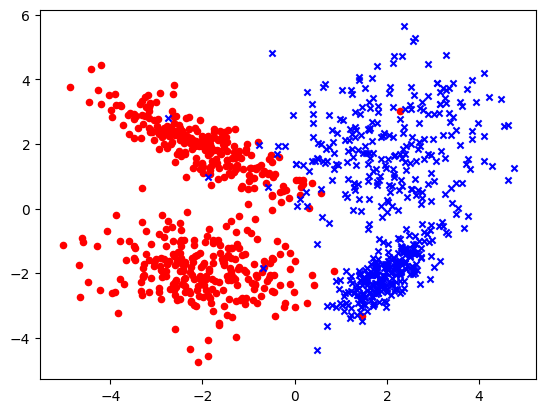

In [6]:
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker = 'o', c = 'r', s = 20)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker = 'x', c = 'b', s = 20)
plt.show()

In [7]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [8]:
class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [9]:
logreg = LogReg()

In [10]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [11]:
X

array([[ 1.        ,  1.86341137,  0.08764555],
       [ 1.        , -1.53099717,  1.90118241],
       [ 1.        , -0.01722404, -2.59111159],
       ...,
       [ 1.        ,  2.33019532,  4.72180951],
       [ 1.        , -2.01084076,  1.42633933],
       [ 1.        , -2.00873243,  2.24540194]])

In [12]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [13]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [14]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [15]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

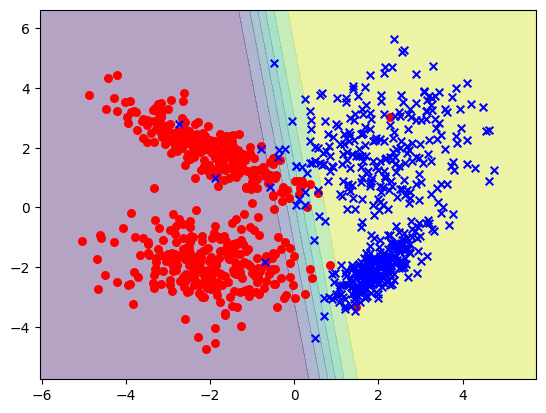

In [16]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=30)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=30)
plt.show()

In [17]:
model = LogisticRegression()
model.fit(X, y)
y_pred_lr = model.predict(X)

In [18]:
ac = accuracy_score(y, y_pred_lr)
f1 = f1_score(y, y_pred_lr)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


**Задания для самостоятельного выполнения**

1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [19]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [20]:
model = LogisticRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [21]:
print(f'accuracy = {accuracy_score(y, y_pred)} F1-score = {f1_score(y, y_pred)}')

accuracy = 0.976 F1-score = 0.9761431411530815


In [22]:
confusion_matrix = confusion_matrix(y, y_pred)

In [23]:
confusion_matrix

array([[485,  14],
       [ 10, 491]], dtype=int64)

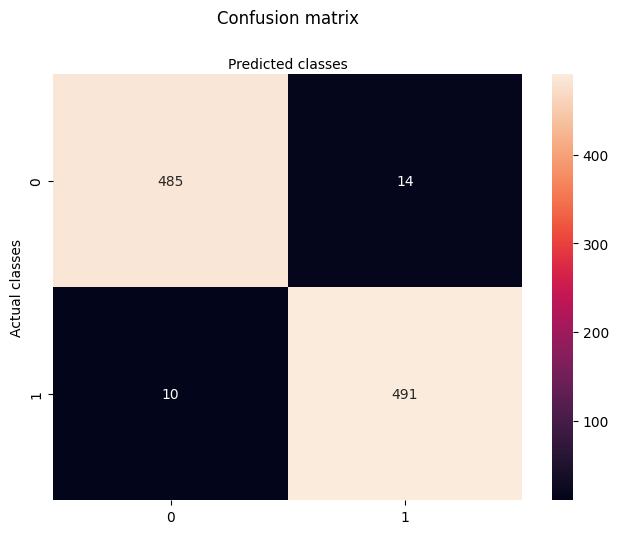

In [24]:
fig , ax = plt.subplots()
plt.xticks(np.arange(2), [0, 1])
plt.yticks(np.arange(2), [0, 1])
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual classes')
plt.xlabel('Predicted classes')
plt.show()

2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [25]:
alphas = [20, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

for v in alphas:
  logreg = LogReg()
  logreg._alpha = v
  logreg.fit(X, y)
  y_pred = logreg.predict(X)
  ac = accuracy_score(y, y_pred)
  f1 = f1_score(y, y_pred)
  print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98
accuracy = 0.98 F1-score = 0.98
accuracy = 0.98 F1-score = 0.98
accuracy = 0.98 F1-score = 0.98
accuracy = 0.97 F1-score = 0.97
accuracy = 0.92 F1-score = 0.92
accuracy = 0.73 F1-score = 0.77
accuracy = 0.71 F1-score = 0.75


3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [26]:
class SGD_new():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [27]:
class LogReg_new(SGD_new):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [28]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [29]:
logreg = LogReg_new()
logreg.fit(X, y)
y_pred = logreg.predict(X)
y_pred

array([ True, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True,  True,  True,  True, False, False,  True, False,
       False, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False, False, False,  True,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True, False, False,
        True,  True,  True,  True, False,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
       False,  True,

4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

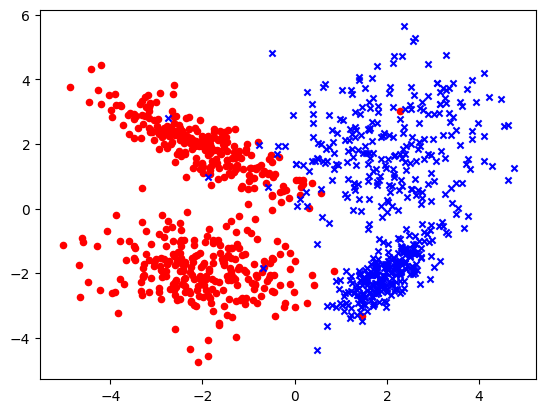

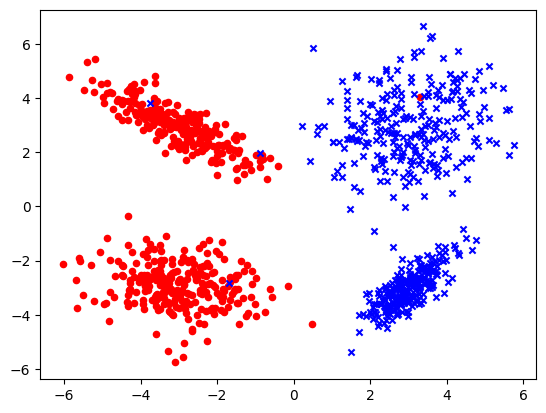

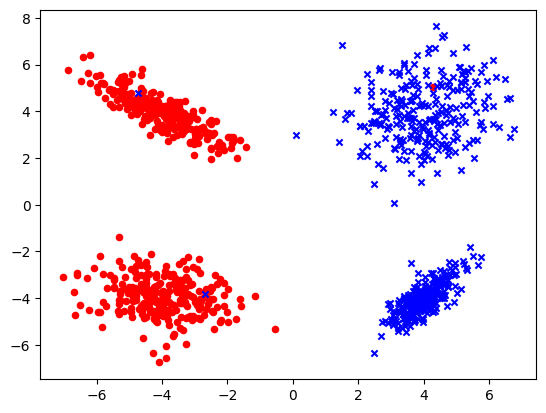

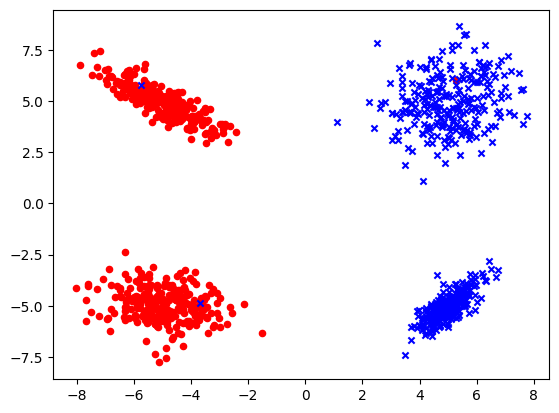

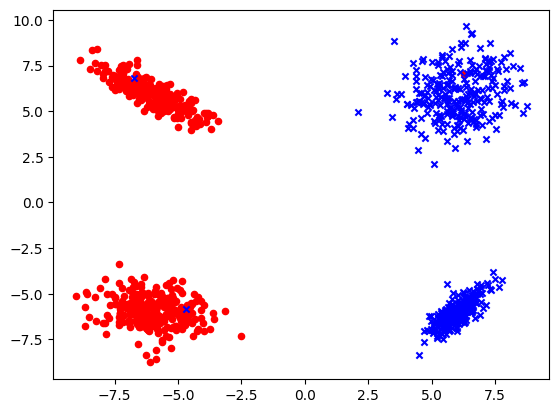

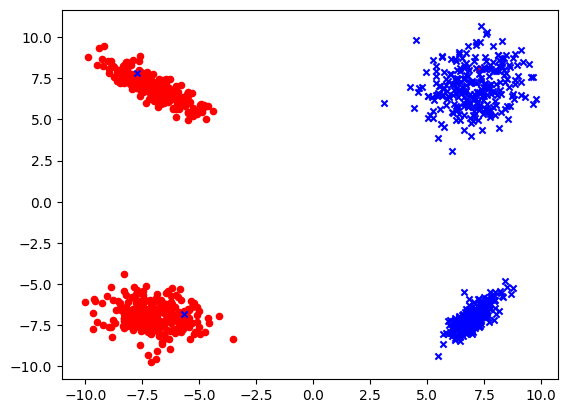

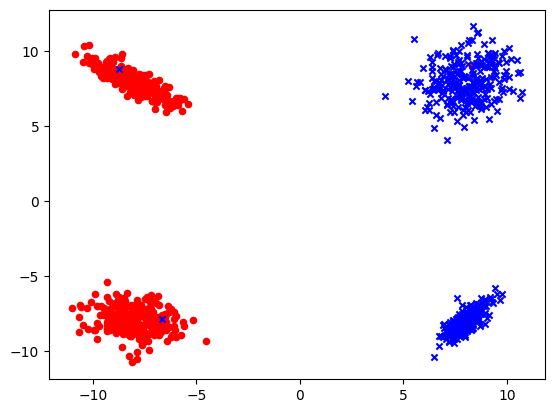

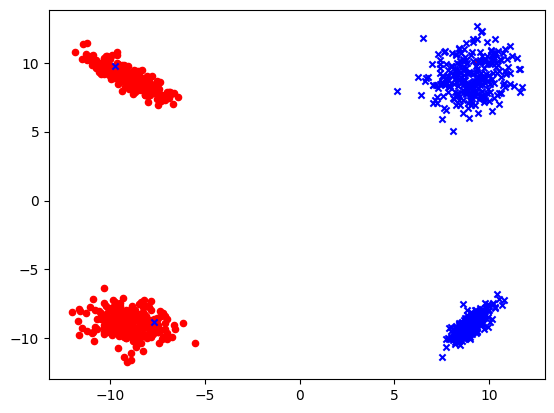

In [30]:
for i in range(2, 10):
  X,y = make_classification(n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=i,
                          random_state=1)
  plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker = 'o', c = 'r', s = 20)
  plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker = 'x', c = 'b', s = 20)
  plt.show()

Параметр class_sep меняет расстояние между классами. Если class_sep принимает большие значения, то задача классификации становится легче.

5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [31]:
X,y = make_classification (n_samples=1000,
                          n_features=10,
                          n_informative=10,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [32]:
X.shape

(1000, 11)

In [33]:
logreg = LogReg()

In [34]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [35]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.99 F1-score = 0.99


6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [60]:
X,y = make_classification (n_samples=1000,
                          n_informative=8,
                          n_features=20,
                          n_classes=100,
                          random_state=42)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [66]:
X.shape

(1000, 21)

In [67]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.1)

In [68]:
model = OneVsRestClassifier(SVC())

In [69]:
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [71]:
prediction = model.predict(X_test) 
   
print(accuracy_score( y_test, prediction)) 
print(classification_report(y_test, prediction)) 

0.06
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         2
          14       0.50      0.25      0.33         4
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       1.0

c:\Users\binan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\binan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\binan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [36]:
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [37]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [38]:
pd.DataFrame(model.predict_proba(X)).head(10).round(decimals = 5)

,0,1
0,0.00376,0.99624
1,0.98615,0.01385
2,0.79329,0.20671
3,0.99933,0.00067
4,0.00000,1.00000
5,0.00727,0.99273
6,0.00002,0.99998
7,0.93978,0.06022
8,0.99994,0.00006
9,0.99478,0.00522
